You can install the dependencies for this session (include Jupyter) by using mamba/conda and the provided `env.yaml` file:
```{bash}
mamba env create -f env.yaml
```

To simulate the frequency trajectory of a selectively neutral allele in a haploid Wright-Fisher population, we can simply draw from a binomial distribution for each generation:


In [14]:
import numpy as np


def wright_fisher_biallelic(p: float, N: int, n: int) -> list:
    """
    Simulate the frequency of a neutral allele in a Wright-Fisher population.
    
    :param p: initial frequency of the derived allele
    :param N: population size
    :param n: number of generations to simulate
    :return: list of derived allele frequencies of size n + 1
    """
    freqs = [p]

    for _ in range(n):
        # divide by N to obtain frequency
        p = np.random.binomial(N, p) / N

        freqs.append(p)

    return freqs

Let's visualize the trajectory of the allele frequency for a population of size 1000, starting with an allele frequency of 0.5, over 100 generations:

In [15]:
import matplotlib.pyplot as plt


def visualize_trajectory(freqs: list):
    """
    Visualize the trajectory of allele frequencies.
    
    :param freqs: list of allele frequencies 
    """
    plt.plot(freqs)

    plt.xlabel("Generation")
    plt.ylabel("Frequency")

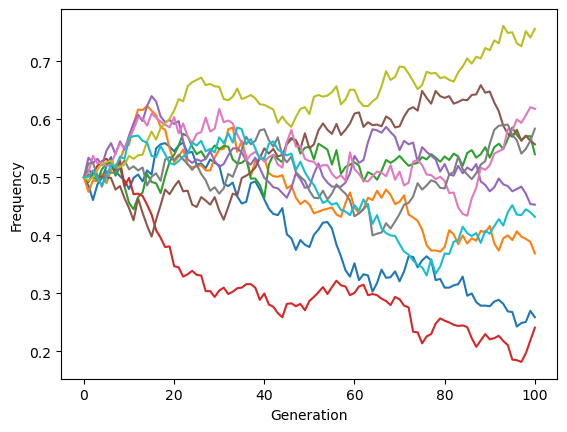

In [18]:
[visualize_trajectory(wright_fisher_biallelic(p=0.5, N=1000, n=100)) for _ in range(10)];

Now record the probability that the derived allele eventually reaches fixation (frequency 1). You will have to run the simulation for sufficiently many generations to make sure that the derived allele reaches fixation or is lost. You will also have to repeat the simulation multiple times to estimate the probability of fixation precisely.

In [21]:
import logging


def is_fixed_derived_allele(freqs: list) -> bool:
    """
    Check if the derived allele gets fixed in a Wright-Fisher population.
    
    :param freqs: list of allele frequencies
    :return: True if the derived allele is fixed, False otherwise
    """
    # warning if the derived allele is not fixed or lost
    if freqs[-1] not in {0, 1}:
        logging.warning(f"Both alleles are still segregating: {freqs[-1]}")

    return freqs[-1] == 1


# example
is_fixed_derived_allele(wright_fisher_biallelic(0.5, 1000, 2000))

False

In [26]:
i = 0
count = 0
while i < 100:
    if is_fixed_derived_allele(wright_fisher_biallelic(0.5, 1000, 2000)):
        count += 1
    i += 1
print(count)    #45 %

46


Now change the initial allele frequency to different values and record the probability of fixation for each value. What do you observe? You can also set the allele frequency to `1 / N`, which is frequency of a newly-arisen mutation in a population of size `N`.

In [105]:
i = 0
count = 0
while i < 1000:
    if is_fixed_derived_allele(wright_fisher_biallelic(1/1000, 1000, 2000)):
        count += 1
    i += 1
print(count)    #Numbers

2


We can also record the average time to fixation or loss of the derived allele:

In [144]:
def get_fixation_time(freqs: list) -> int:
    """
    Get the time to fixation or loss given the derived allele frequencies per generation.
    
    :param p: initial frequency of the derived allele
    :param N: population size
    :return: time to fixation or loss in number of generations
    """
    if freqs[-1] not in {0, 1}:
        logging.warning(f"Both alleles are still segregating: {freqs[-1]}")

        return len(freqs)

    return ((np.array(freqs) == 0) | (np.array(freqs) == 1)).argmax()


# example
get_fixation_time(wright_fisher_biallelic(0.5, 1000, 2000))

314

Determine the average time to fixation or loss of the derived allele for different initial allele frequencies. You will again have to average over multiple simulations to obtain a precise estimate. Is this what you expected?

In [145]:
i = 0
times = []
while i < 1000:
    times.append(get_fixation_time(wright_fisher_biallelic(0.5, 1000, 2000)))
    
    i += 1
    #Numbers  
print(sum(times)/len(times))

1378.956


Also determine the variance in the time to fixation or loss.

We can also incorporate selection into the simulation by changing the probability of sampling the derived allele:

In [9]:
def wright_fisher_biallelic_selection(p: float, N: int, n: int, s: float) -> list:
    """
    Simulate the frequency of an allele in a Wright-Fisher population with selection.
    
    :param p: initial frequency of the derived allele
    :param N: population size
    :param n: number of generations to simulate
    :param s: selection coefficient
    :return: list of allele frequencies of size n + 1
    """
    freqs = [p]

    # number of derived alleles
    k = p * N

    for _ in range(n):
        # probability of sampling the derived allele given selection
        p = k * (1 + s) / (k * (1 + s) + (N - k))

        k = np.random.binomial(N, p)

        freqs.append(k / N)

    return freqs

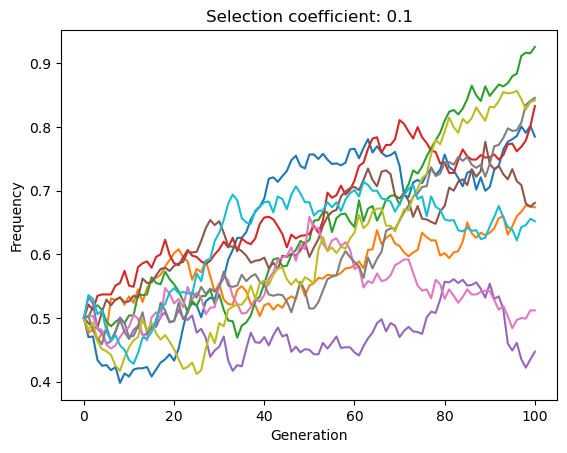

In [10]:
# visualize the trajectory for beneficial allele
[visualize_trajectory(wright_fisher_biallelic_selection(0.5, 1000, 100, 0.01)) for _ in range(10)]
plt.title("Selection coefficient: 0.1");

Now compare the time to loss or fixation for different values of `s`. Set the remaining parameters to `{N: 1000, p: 0.5, n: 100}`.

In [11]:
# YOUR CODE HERE

Now, can you determine the probability that a beneficial derived allele reaches fixation for different population sizes. Do you expect the probability to change with population size? Justify your answer.

In [12]:
# example for N = 100
np.mean([is_fixed_derived_allele(wright_fisher_biallelic_selection(p=0.5, N=100, n=2000, s=0.01)) for _ in range(1000)])

0.705

In [13]:
# YOUR CODE HERE